----------

## <span style="color:green">Комментарий от наставника<span>

Привет! Поздралвяю со сдачей проекта.

Хочу пройти по пунктам, что получилось, круто:

1. Загрузка и подготовка данных - прекрасно
1. Обработка пропусков - отлично, есть гипотезы по причинам и с учётом решаемой задачи
1. Преобразование типов данных - все верно
1. Корреляция отлично
1. Визуализация тоже хороша и понятна
1. Хороший код
1. Работа структурирована и хорошо оформлена
1. Гипотезы оценены верно

Отличная работа

----------


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 
from scipy import stats as st
from pathlib import Path
path = Path.cwd()

In [5]:
gd = pd.read_csv('{}/datasets/game_data.csv'.format(path))
rating_dict = pd.read_csv('{}/datasets/rating.csv'.format(path))

In [6]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4026 non-null   int64  
 1   platform      4026 non-null   object 
 2   sales_year    4026 non-null   float64
 3   genre         4026 non-null   object 
 4   online        4026 non-null   float64
 5   offline       4026 non-null   float64
 6   critic_score  1812 non-null   float64
 7   user_score    2382 non-null   object 
 8   rating        2315 non-null   object 
 9   game_id       4026 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 314.7+ KB


##### Поменяем типы данных:
* sales_year -> int
* online -> int
* offline -> int
* user_score -> float

##### В столбцах critic_score, user_score, rating  пропущена часть данных

In [7]:
gd.sales_year.value_counts()

2017.0    1683
2018.0    1235
2015.0     606
2016.0     502
Name: sales_year, dtype: int64

In [8]:
gd['sales_year'] = pd.DatetimeIndex(pd.to_datetime(gd['sales_year'], format='%Y')).year
gd['online'] = gd['online'].astype('int')
gd['offline'] = gd['offline'].astype('int')
try:
    gd['user_score'] = gd['user_score'].astype('float')
except:
    print('Ошибка конвертации поля user_score')

Ошибка конвертации поля user_score


In [9]:
gd.sales_year.value_counts()

2017    1683
2018    1235
2015     606
2016     502
Name: sales_year, dtype: int64

"tbd" в поле user_score означает что пользовтальская оценка ещё не определена. Т.к. обновления данных ждать не стоит, заменим "tbd" на "NaN" и обновим тип данных

In [10]:
gd.loc[gd['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
try:
    gd['user_score'] = gd['user_score'].astype('float')
except:
    print('Ошибка конвертации поля user_score')

In [12]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4026 non-null   int64  
 1   platform      4026 non-null   object 
 2   sales_year    4026 non-null   int64  
 3   genre         4026 non-null   object 
 4   online        4026 non-null   int64  
 5   offline       4026 non-null   int64  
 6   critic_score  1812 non-null   float64
 7   user_score    2032 non-null   float64
 8   rating        2315 non-null   object 
 9   game_id       4026 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 314.7+ KB


In [13]:
gd.head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
0,0,PS3,2017,Action,702,909,97.0,8.2,M,20838
1,1,X360,2017,Action,966,514,97.0,8.1,M,48673
2,2,X360,2017,Shooter,904,424,88.0,3.4,M,17801
3,3,PS4,2015,Shooter,603,586,NaN,NaN,NaN,12200
4,4,3DS,2017,Role-Playing,528,419,NaN,NaN,NaN,11432


Посмотрим на распределение данных в датафрейме

In [14]:
gd.describe(include='all')

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
count,4026.00000,4026,4026.000000,4026,4026.000000,4026.000000,1812.000000,2032.000000,2315,4026.000000
unique,NaN,12,NaN,12,NaN,NaN,NaN,NaN,6,NaN
top,NaN,PS3,NaN,Action,NaN,NaN,NaN,NaN,M,NaN
freq,NaN,708,NaN,1270,NaN,NaN,NaN,NaN,622,NaN
mean,2012.50000,NaN,2016.881023,NaN,20.613761,16.633880,71.274283,6.633022,NaN,30186.204421
std,1162.35042,NaN,1.009767,NaN,57.016690,48.262997,13.095847,1.541293,NaN,11533.933695
min,0.00000,NaN,2015.000000,NaN,0.000000,0.000000,13.000000,0.200000,NaN,10011.000000
25%,1006.25000,NaN,2016.000000,NaN,0.000000,0.000000,64.000000,5.800000,NaN,20125.500000
50%,2012.50000,NaN,2017.000000,NaN,4.000000,3.000000,74.000000,7.000000,NaN,30302.500000
75%,3018.75000,NaN,2018.000000,NaN,17.000000,13.000000,81.000000,7.800000,NaN,40211.250000


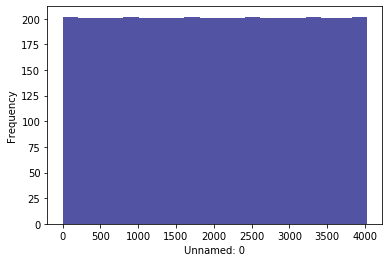

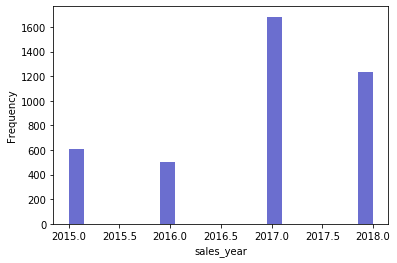

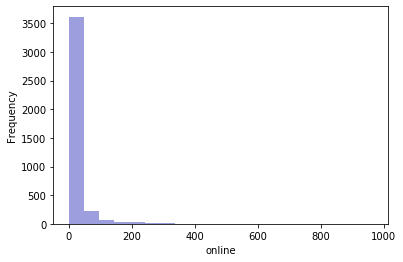

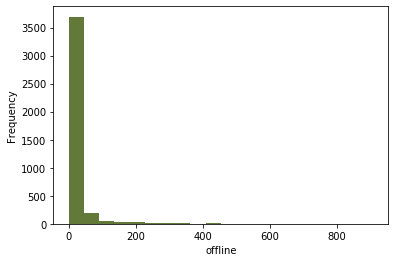

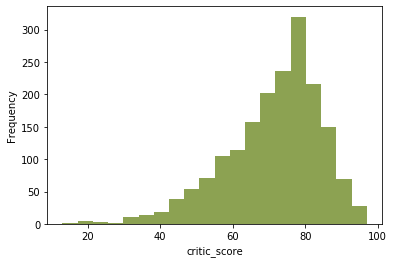

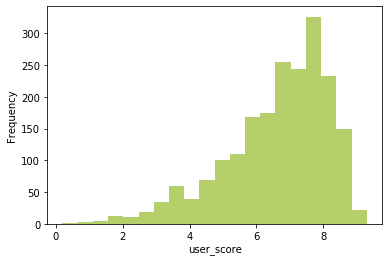

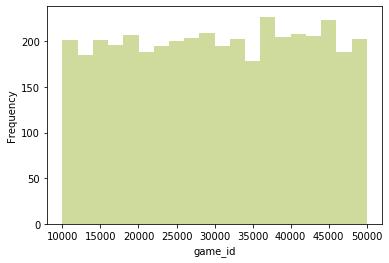

In [15]:
def df_graph(df):
    df = df.select_dtypes([np.int32, np.float64, np.int64])
    # создаём палитру чтобы было не скучно :)
    palette = plt.get_cmap('tab20b')
    num=0
    for (columnName, columnData) in df.iteritems():
        num+=1
        plt.figure()
        df[columnName].plot(kind='hist', bins = 20, color=palette(num))
        plt.xlabel(columnName)
        
df_graph(gd)

Что видим:
* основная масса игр прдаётся небольшими тиражами, но есть и очень популярные позиции. В онлайне и офлайне ситуации похожи
* распределение оценок критиков и пользователей имеет одинаковую форму с длинным хвостом слева. Критики оценивают игры в диапазоне от 1 до 100, пользователи от 1 до 10
* есть пропущенные значения в столбцах critic_score, user_score, rating
    * где пропущен rating можно проставить RP, это ни к чему не обязывает
    * есть всего одна запись с рейтингом EC, чтобы не мешала объединим её с рейтингом E

In [16]:
gd.rating.value_counts()

M       622
E       619
T       616
E10+    456
RP        1
EC        1
Name: rating, dtype: int64

In [17]:
gd.loc[gd['rating'] == 'EC', 'rating'] = 'E'
gd.loc[gd.rating.isnull(), 'rating'] = 'RP'
gd.rating.value_counts()

RP      1712
M        622
E        620
T        616
E10+     456
Name: rating, dtype: int64

Проверим сколько уникальных игр всего в выборке. Возможно одни и те же игры выходили на разных платформах, тогда стоит исследовать на сколько рейтинг игры отличается от платформы к платформе

In [18]:
print('Уникальных игр:', gd.game_id.nunique())

Уникальных игр: 3836


Посмотрим как меняется рейтинг в зависимости от платформы

In [19]:
gd[gd.rating != 'RP']['game_id'].value_counts().head()

36048    3
32226    2
14793    2
37265    2
49504    2
Name: game_id, dtype: int64

In [20]:
gd.query('game_id == [36048, 32226, 14793, 37265, 49504]').sort_values(by='game_id')

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
637,637,X360,2018,Shooter,46,19,74.0,6.4,M,14793
833,833,PS3,2017,Misc,25,19,66.0,8.4,E10+,14793
1858,1858,Wii,2018,Sports,14,0,NaN,NaN,E,32226
2323,2323,WiiU,2016,Misc,3,6,NaN,NaN,E10+,32226
1409,1409,PC,2015,Strategy,9,13,80.0,7.3,T,36048
1595,1595,PSV,2018,Action,10,5,58.0,5.1,M,36048
1946,1946,PS3,2018,Fighting,0,0,84.0,8.1,T,36048
228,228,XOne,2015,Racing,73,90,87.0,7.9,E,37265
1518,1518,3DS,2015,Strategy,14,5,69.0,7.7,T,37265
327,327,PC,2017,Shooter,39,87,81.0,6.0,M,49504


Для одного game_id игры на разных платформах идут с разным рейтингом и в разных жанрах. 
#### Далее будем считать что записи с одинаковым game_id относятся к разным играм

Возможно рейтинг связан с жанром игры. Если этот так, то мы можем проставить пропущенный рейтинг на основе жанра

In [21]:
# gd.plot(kind='scatter', x='genre', y='rating')
# sns.stripplot(x='')
gd_grouped = gd[gd['rating'] != 'RP'].groupby(['genre', 'rating']).count()['game_id'].unstack().fillna(0)
gd_grouped.head()
# gd_grouped.plot(kind='bar', stacked=True)

rating,E,E10+,M,T
genre,,,,
Action,91.0,188.0,255.0,191.0
Adventure,9.0,26.0,40.0,23.0
Fighting,0.0,5.0,17.0,87.0
Misc,71.0,75.0,5.0,43.0
Platform,45.0,51.0,0.0,6.0


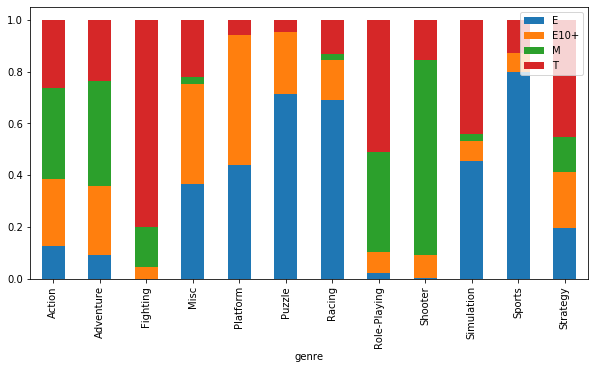

In [22]:
gd_grouped = pd.crosstab( gd[gd['rating'] != 'RP']['rating'], gd[gd['rating'] != 'RP']['genre']).apply(lambda x:x/sum(x)).transpose()
gd_grouped
gd_grouped.plot(kind='bar', stacked=True, figsize=(10,5))
plt.legend(loc='upper right')

##### Для некоторых жанров есть "основной" рейтинг. Для Sport, Racing, Puzzle - E, Shooter - M, Fighting - T. Заполним пропущенные рейтинги данными значениями


In [23]:
gd[gd['rating'] == 'RP']['genre'].value_counts()

Action          545
Adventure       312
Role-Playing    256
Misc            181
Sports          102
Strategy         66
Simulation       60
Fighting         50
Shooter          47
Racing           44
Puzzle           29
Platform         20
Name: genre, dtype: int64

In [24]:
gd.loc[(gd['rating'] == 'RP') & (gd['genre'].isin(['Sports', 'Racing', 'Puzzle'])), 'rating'] = 'E'
gd.loc[(gd['rating'] == 'RP') & (gd['genre'].isin(['Shotter'])), 'rating'] = 'M'
gd.loc[(gd['rating'] == 'RP') & (gd['genre'].isin(['Fighter'])), 'rating'] = 'T'

In [25]:
gd[gd['rating'] == 'RP']['genre'].value_counts()

Action          545
Adventure       312
Role-Playing    256
Misc            181
Strategy         66
Simulation       60
Fighting         50
Shooter          47
Platform         20
Name: genre, dtype: int64

Не удалось разметить самые популярные категории Action и Adventure. Пока остановимся на этом<br>
Добавим столбец с суммой продаж онлайн и офлайн

In [26]:
gd['sales'] = gd['online'] + gd['offline']

### Исследовательский анализ
количество игр по годам продажи

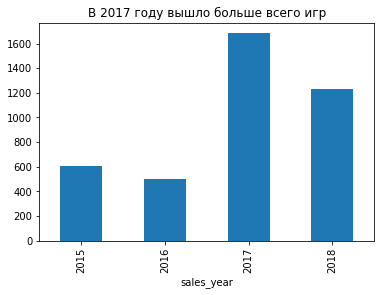

In [27]:
gd.groupby('sales_year').count()['game_id'].plot(kind='bar', title='В 2017 году вышло больше всего игр')

В 2017 году был самый большой ассортимент, продавалось больше 1600 игр. Рост по отношению к 2016 году - в три раза. Возможно вышла новая платформа, для проверки добавим разбивку по ним

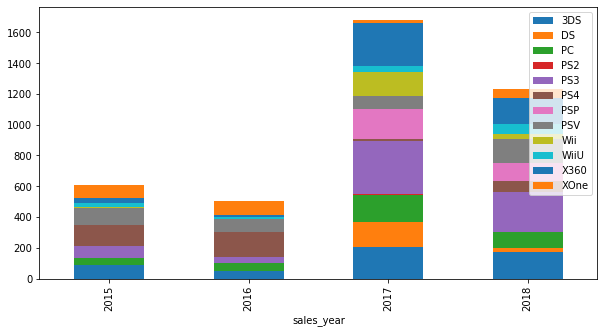

In [28]:
gd.groupby(['sales_year', 'platform']).count()['game_id'].unstack().fillna(0).plot(kind='bar', stacked=True, figsize=(10, 5))
plt.legend(loc='upper right')

В 2016 году больше всего игр на платформе PS4, а в 2017 на PS3. Как-то странно :( Появилисm игры под Wii и PSP. <br>
Посмотрим этот же график для игр с отзывами и без

In [29]:
gd['is_critic_score'] = ~gd['critic_score'].isna()
gd['is_user_score'] = ~gd['user_score'].isna()
gd.head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales,is_critic_score,is_user_score
0,0,PS3,2017,Action,702,909,97.0,8.2,M,20838,1611,True,True
1,1,X360,2017,Action,966,514,97.0,8.1,M,48673,1480,True,True
2,2,X360,2017,Shooter,904,424,88.0,3.4,M,17801,1328,True,True
3,3,PS4,2015,Shooter,603,586,NaN,NaN,RP,12200,1189,False,False
4,4,3DS,2017,Role-Playing,528,419,NaN,NaN,RP,11432,947,False,False


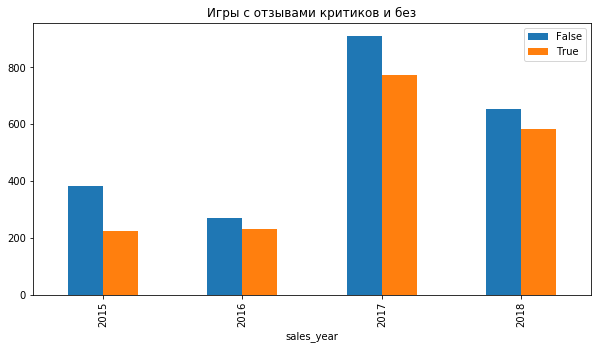

In [30]:
gd.groupby(['sales_year','is_critic_score']).count()['game_id'].unstack().fillna(0).plot(kind='bar', figsize=(10, 5), title='Игры с отзывами критиков и без')
plt.legend(loc='upper right')

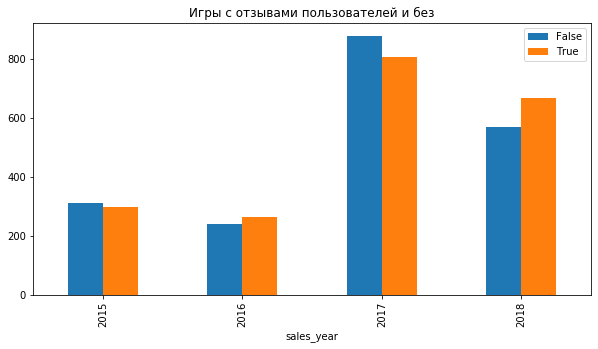

In [31]:
gd.groupby(['sales_year','is_user_score']).count()['game_id'].unstack().fillna(0).plot(kind='bar', figsize=(10, 5), title= 'Игры с отзывами пользователей и без')
plt.legend(loc='upper right')

* Количество игр без оценок критиков всегда было больше чем с оценками. Соотношение от года к году сильно не меняется
* Количество игр с оценкой пользователей примерно равно количеству игр без оценки

#### Посмотрим как менялся объём продаж 


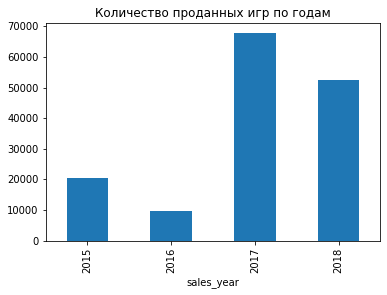

In [32]:
gd.groupby('sales_year').sum()['sales'].plot(kind='bar', title='Количество проданных игр по годам')

Количество проданных игр сильно выросло в 2017м году в 7 раз!<br>
Построим boxplot

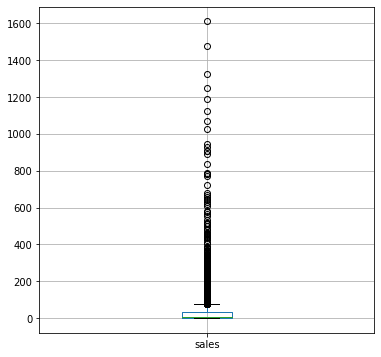

In [33]:
gd.boxplot(column='sales', figsize=(6, 6))

75% игр продаётся тиражом меньше 75штук в год<br>
Посмотрим на какаой платформе было продано больше всего игр

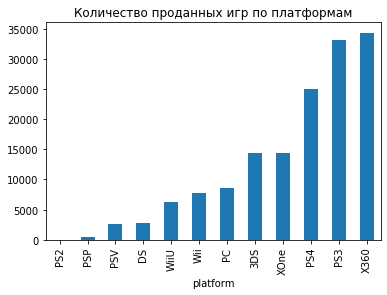

In [34]:
gd.groupby('platform').sum()['sales'].sort_values().plot(kind='bar', title='Количество проданных игр по платформам')

Больше всего игр продано под X360. Под PS3 практически столько же. Попробуем сгруппировать платформы

SONY         1851
Nintendo     1041
Microsoft     745
PC            389
Name: grouped_platform, dtype: int64


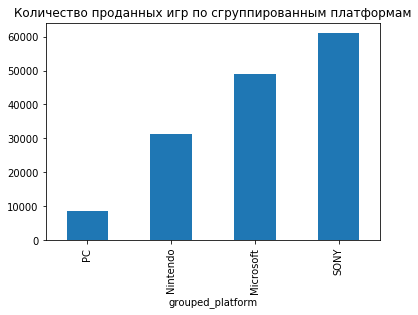

In [35]:
def group_platform(platform):
    if platform in ['PS2', 'PSP', 'PSV', 'PS3', 'PS4']:
        return 'SONY'
    elif platform in ['XOne', 'X360']:
        return 'Microsoft'
    elif platform in ['DS', '3DS', 'Wii', 'WiiU']:
        return 'Nintendo'
    else:
        return platform
    
gd['grouped_platform'] = gd['platform'].apply(group_platform)
print(gd['grouped_platform'].value_counts())
gd.groupby('grouped_platform').sum()['sales'].sort_values().plot(kind='bar', title='Количество проданных игр по сгруппированным платформам')

Несмотря на то, что больше всего игр продано под X360 лидирующем производителем является SONY<br>
Посмотрим на разбивку по жанрам

In [36]:
gd.groupby('genre').sum()['sales'].sort_values(ascending=False)

genre
Action          42998
Shooter         34241
Sports          19713
Role-Playing    14606
Misc            10939
Racing           7254
Platform         6834
Fighting         4787
Simulation       3535
Adventure        2872
Strategy         1550
Puzzle            630
Name: sales, dtype: int64

Пазлы и стратегии пользуются наименьшей популярностью. Экшены и шутеры - максимальной<br>
##### Найдём игры с наибольшей и наименьшей оценкой от пользователей

In [37]:
gd.sort_values(by='user_score', ascending=False).head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales,is_critic_score,is_user_score,grouped_platform
2348,2348,PSV,2015,Adventure,0,3,86.0,9.3,M,38270,3,True,True,SONY
639,639,PC,2015,Role-Playing,21,46,93.0,9.3,M,12365,67,True,True,PC
77,77,PS4,2015,Role-Playing,102,213,92.0,9.2,M,43575,315,True,True,SONY
339,339,XOne,2015,Role-Playing,69,50,91.0,9.2,M,10495,119,True,True,Microsoft
2277,2277,PSV,2017,Adventure,4,4,83.0,9.2,M,27691,8,True,True,SONY


In [38]:
gd.sort_values(by='user_score', ascending=True).head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales,is_critic_score,is_user_score,grouped_platform
2118,2118,PS3,2016,Sports,7,2,NaN,0.2,E,23493,9,False,True,SONY
1739,1739,X360,2016,Sports,14,2,NaN,0.7,E,28773,16,False,True,Microsoft
2695,2695,DS,2017,Platform,6,0,NaN,0.9,E,14384,6,False,True,Nintendo
3026,3026,PS3,2017,Racing,2,1,13.0,1.0,M,28618,3,True,True,SONY
2321,2321,X360,2017,Shooter,7,2,43.0,1.2,M,24620,9,True,True,Microsoft


Спорт явно разочаровывает пользователей. Посмотрим теже данные для критиков

In [39]:
gd.sort_values(by='critic_score', ascending=False).head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales,is_critic_score,is_user_score,grouped_platform
0,0,PS3,2017,Action,702,909,97.0,8.2,M,20838,1611,True,True,SONY
9,9,PS4,2018,Action,396,631,97.0,8.3,M,28618,1027,True,True,SONY
44,44,XOne,2018,Action,281,219,97.0,7.9,M,39055,500,True,True,Microsoft
1,1,X360,2017,Action,966,514,97.0,8.1,M,48673,1480,True,True,Microsoft
19,19,X360,2017,Role-Playing,505,279,96.0,8.4,M,29673,784,True,True,Microsoft


In [40]:
gd.sort_values(by='critic_score', ascending=True).head()

,Unnamed: 0,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,sales,is_critic_score,is_user_score,grouped_platform
3026,3026,PS3,2017,Racing,2,1,13.0,1.0,M,28618,3,True,True,SONY
2812,2812,X360,2017,Racing,4,1,19.0,1.3,M,11902,5,True,True,Microsoft
2127,2127,PS4,2015,Sports,4,6,19.0,3.4,E,12797,10,True,True,SONY
2415,2415,XOne,2015,Sports,3,5,20.0,3.1,E,42977,8,True,True,Microsoft
2121,2121,X360,2017,Sports,8,3,21.0,5.0,T,18203,11,True,True,Microsoft


Самые провальные игры для критиков: гонки и спорт<br>
Оценим корреляцию между оценками пользователей и критиков

user_score  critic_score
user_score      1.000000      0.534853
critic_score    0.534853      1.000000


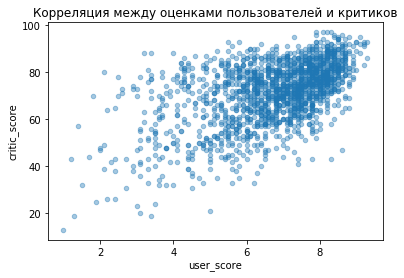

In [41]:
# plt.scatter(gd['user_score']*10, gd['critic_score'])
gd.plot(kind='scatter', x='user_score', y='critic_score', alpha=0.4, title='Корреляция между оценками пользователей и критиков')
print(gd[['user_score', 'critic_score']].corr())

* Прослеживается положительная корреляция между оценками
* Критики более щедрые на оценки(проплачены?:))
* Чаще всего критики ставят больше 60, пользователи больще 6. Если оценки ниже я бы назвал такие игры провальными. Посмотрим как коррелирует объём продаж с оценками

user_score  critic_score     sales
user_score      1.000000      0.534853  0.010203
critic_score    0.534853      1.000000  0.329492
sales           0.010203      0.329492  1.000000


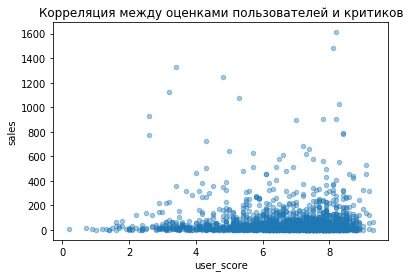

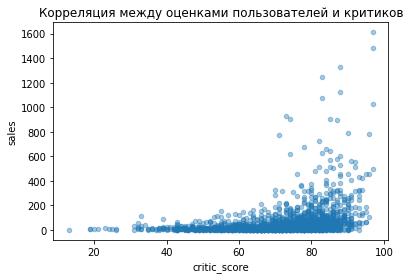

In [42]:
print(gd[['user_score', 'critic_score', 'sales']].corr())
gd.plot(kind='scatter', x='user_score', y='sales', alpha=0.4, title='Корреляция между оценками пользователей и критиков')
gd.plot(kind='scatter', x='critic_score', y='sales', alpha=0.4, title='Корреляция между оценками пользователей и критиков')

Удивительно, но объём продаж и оценки пользователей никак не коррелируют. Зато с продажами хорошо соотносятся оценки критиков: самые продающиеся игры получили самые лучшие оценки. Или наоборот: поддержанные критиками игры лучше всего продаются

#### Составим портреты онлайн и офлайн покупателей
топ-5 предпочтительных жанров

In [43]:
gd.groupby('genre').sum()['online'].sort_values(ascending=False).head()

genre
Action          23088
Shooter         19443
Sports          10866
Role-Playing     8377
Misc             6967
Name: online, dtype: int64

In [44]:
gd.groupby('genre').sum()['offline'].sort_values(ascending=False).head()

genre
Action          19910
Shooter         14798
Sports           8847
Role-Playing     6229
Racing           4056
Name: offline, dtype: int64

TOP-4 жанров для онлайн и офлайн совпадают<br>
#### Посмотрим на активность по годам

In [45]:
gd.groupby('sales_year').sum()['online'].head()

sales_year
2015    10684
2016     4493
2017    39240
2018    28574
Name: online, dtype: int64

In [46]:
gd.groupby('sales_year').sum()['offline'].head()

sales_year
2015     9672
2016     5119
2017    28446
2018    23731
Name: offline, dtype: int64

На онлайн стабильно приходится больше продаж. Но оффлайн занимает существенную долю<br>
Посмотрим на разбику по платформам

In [47]:
gd.groupby('platform').sum()['online'].sort_values(ascending=False).head()

platform
X360    22675
PS3     16823
PS4     10873
XOne     9312
3DS      8265
Name: online, dtype: int64

In [48]:
gd.groupby('platform').sum()['offline'].sort_values(ascending=False).head()

platform
PS3     16307
PS4     14106
X360    11709
3DS      6126
PC       5669
Name: offline, dtype: int64

В онлайне покупают чаще X360, а в офлайне PS3\PS4. Может связано с удобством покупки для X360?<br>
Посомтрим на частотность рейтинга

In [49]:
gd.groupby('rating').sum()['online'].sort_values(ascending=False).head()

rating
M       30842
E       18157
E10+    11770
RP      11294
T       10928
Name: online, dtype: int64

In [50]:
gd.groupby('rating').sum()['offline'].sort_values(ascending=False).head()

rating
M       25021
E       16606
RP       9228
T        8313
E10+     7800
Name: offline, dtype: int64

Рейтинги M и E самые частотные для онлайн и офлайн
### Проверим гипотезы
средний пользовательский рейтинг платформ PS4 и PS3 одинаковый<br>
Нулевая гипотеза: рейтинги одинаковые

In [51]:
gd[gd['platform'] == 'PS3'].groupby('sales_year').mean()['user_score'].reset_index()['user_score']

0    5.946154
1    4.411111
2    6.756757
3    6.644375
Name: user_score, dtype: float64

In [52]:
alpha = .05
results = st.ttest_ind(
    gd[gd['platform'] == 'PS3'].groupby('sales_year').mean()['user_score'].reset_index()['user_score'],
    gd[gd['platform'] == 'PS4'].groupby('sales_year').mean()['user_score'].reset_index()['user_score']
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-value: 0.4332020985615363
Не получилось отвергнуть нулевую гипотезу


##### Действительно можно сказать что рейтинги одинаковые
Проверим следующую гипотезу что средний пользовательский рейтинг жанров Action и Sports различается <br>
Нулевая гипотеза: рейтинги совпадают

In [53]:
alpha = .05
results = st.ttest_ind(
    gd[gd['genre'] == 'Action'].groupby('sales_year').mean()['user_score'].reset_index()['user_score'],
    gd[gd['genre'] == 'Sports'].groupby('sales_year').mean()['user_score'].reset_index()['user_score']
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')



p-value: 0.0014066574995830802
Отвергаем нулевую гипотезу


P-value очень маленькое. Мы точно не можем сказать что оценки для двух жанров совпадают

## Основная рекомендация: при закупках ориентироваться на оценки критиков
#### Самые продающиеся жанры: Action, Shooter, Sports
#### Самые популярные платформы: PS3, PS4, X360
#### Рейтинг: M, E

Это не означает что не надо закупать игры других жанров или платформ. Но если нужно сократить ассортимент, то только не из этих категорий